# 빅데이터분석기사 실기 스터디 1주차(10.12 ~ 10.14)
***

## 데이터 전처리 작업(빅분기 작업 항목 2번)


### 1. 데이터 정제 -> <font color = 'red'>정답은 없다!

#### 1-1. 이상치 - 삭제, 변환 등이 있다.

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [30]:
data = pd.read_csv('/Users/kisehyun/Vacation/2019winter/ml/credit/credit_train.csv').dropna()

In [4]:
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,Fully Paid,99999999.0,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,Fully Paid,99999999.0,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0


In [82]:
data.shape

(36423, 19)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입

#### 이상치란 무엇일까? -> box plot으로 확인이 가능하다.

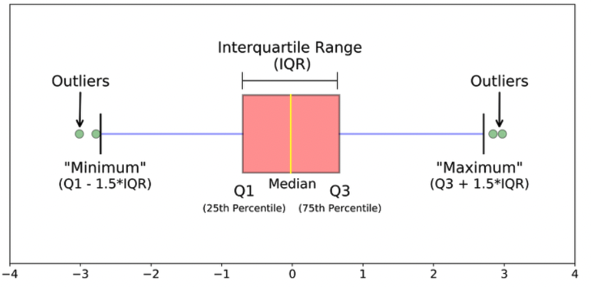

In [85]:
Image('이상치.png')

출처 : https://ssoondata.tistory.com/87
***

In [7]:
data['Monthly Debt']

2        29200.53
6        10855.08
8        18660.28
10       11851.06
12       11578.22
           ...   
99990    11969.81
99993     6280.64
99994     3727.61
99996    13109.05
99997     7315.57
Name: Monthly Debt, Length: 36423, dtype: float64

In [10]:
q1 = np.percentile(data['Monthly Debt'], 25)

In [11]:
q3 = np.percentile(data['Monthly Debt'], 75)

In [12]:
iqr = q3 - q1 # 3사분위수 - 1사분위수

(11125.735, 24766.12)

In [13]:
med = data['Monthly Debt'].median()

In [14]:
med

17117.48

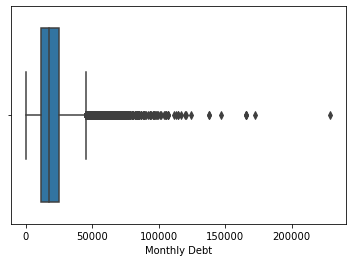

In [86]:
sns.boxplot(data['Monthly Debt'])
plt.show()

#### - np.percentile(value, percent) -> value의 percent%지점의 값을 반환한다.


In [15]:
q1, q3 = np.percentile(data['Monthly Debt'], 25), np.percentile(data['Monthly Debt'], 75)

In [16]:
print(f'1분위수 값은 {q1}이고 3분위수 값은 {q3}')

1분위수 값은 11125.735이고 3분위수 값은 24766.12


#### - np.quantile(value, percent) -> value의 percent(소수) 지점 값을 반환한다.

In [17]:
q1, q3 = np.quantile(data['Monthly Debt'], 0.25), np.quantile(data['Monthly Debt'], 0.75)

In [18]:
print(f'1분위수 값은 {q1}이고 3분위수 값은 {q3}')

1분위수 값은 11125.735이고 3분위수 값은 24766.12


In [19]:
iqr = q3 - q1 # 3사분위수 - 1사분위수

In [23]:
### 통계적으로 작성된 상한선, 하한선 값이다.

l_b = q1 - (iqr * 1.5) # 하한선
u_b = q3 + (iqr * 1.5) # 상한선

In [22]:
print(f'하한 값은 {l_b}이고 상한 값은 {u_b}')

하한 값은 -9334.842499999999이고 상한 값은 45226.697499999995


In [24]:
data2 = data[(data['Monthly Debt'] >= l_b) & (data['Monthly Debt'] <= u_b)]

In [25]:
data2.shape

(35148, 19)

In [26]:
drop_out_data = data[data['Monthly Debt'] <= u_b]

In [27]:
drop_out_data.shape

(35148, 19)

In [96]:
print(f'원본 데이터 행의 수는 {data.shape[0]}개고 이상치 제거 후 데이터 행의 수는 {drop_out_data.shape[0]}개이다.')

원본 데이터 행의 수는 36423개고 이상치 제거 후 데이터 행의 수는 35148개이다.


<font color = 'red'>Quiz> Number of Open Accounts의 이상치를 제거한 데이터의 행과 열의 크기를 출력하시오.

In [31]:
q1, q3 = np.percentile(data['Number of Open Accounts'], 25), np.percentile(data['Number of Open Accounts'], 75)

In [32]:
iqr = q3 - q1

In [33]:
l_b = q1 - (iqr * 1.5)
u_b = q3 + (iqr * 1.5)

In [34]:
del_outlier = data[(data['Number of Open Accounts'] >= l_b) & (data['Number of Open Accounts'] <= u_b)]

In [35]:
del_outlier.shape

(35494, 19)

#### 1-2. 결측치 처리

- 삭제하는 것이 맞을까? 채워넣는게 맞을까?
- 채워넣는다면 어떤 값으로 채워넣어야 할까?

#### 답은 없다. 타당한 방법 + 좋은 성능 이라면 Good -> 다양한 시도가 필요하다.

In [91]:
data = pd.read_csv("/Users/kisehyun/Competition/데이콘_서울시 따릉이 자전거 이용량 예측/train.csv")

In [29]:
data.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [38]:
data.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [100]:
data.isnull().sum() / data.shape[0]

id                        0.000000
hour                      0.000000
hour_bef_temperature      0.001371
hour_bef_precipitation    0.001371
hour_bef_windspeed        0.006169
hour_bef_humidity         0.001371
hour_bef_visibility       0.001371
hour_bef_ozone            0.052090
hour_bef_pm10             0.061686
hour_bef_pm2.5            0.080192
count                     0.000000
dtype: float64

#### (1) 삭제 - dropna
- how = 'any' -> 한 column이라도 결측치가 존재하면 해당 행 삭제
- how = 'all' -> 모든 column의 값이 결측치면 해당 행 삭제

기존 데이터 행은 1459개

how = any로 지정하면 how = all일 때 보다 데이터가 더 많이 삭제된다.

In [104]:
data.dropna(how = 'any').shape

(1328, 11)

In [105]:
data.dropna(how = 'all').shape

(1459, 11)

#### (2) 대치
- 0으로 채우기
- 평균 대치법
- 중앙값 대치법

In [111]:
data.mean() # 평균값

id                        1105.914325
hour                        11.493489
hour_bef_temperature        16.717433
hour_bef_precipitation       0.031572
hour_bef_windspeed           2.479034
hour_bef_humidity           52.231297
hour_bef_visibility       1405.216884
hour_bef_ozone               0.039149
hour_bef_pm10               57.168736
hour_bef_pm2.5              30.327124
count                      108.563400
dtype: float64

- 평균값으로 결측치 채우기 -> fillna()

- a열의 결측치는 a의 평균 그리고 b열의 결측치는 b의 평균으로 자동 대치

In [113]:
mean_fill = data.fillna(data.mean())

In [116]:
mean_fill.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [110]:
data.median() # 중앙값

id                        1115.000
hour                        11.000
hour_bef_temperature        16.600
hour_bef_precipitation       0.000
hour_bef_windspeed           2.300
hour_bef_humidity           51.000
hour_bef_visibility       1577.000
hour_bef_ozone               0.039
hour_bef_pm10               51.000
hour_bef_pm2.5              26.000
count                       96.000
dtype: float64

In [114]:
median_fill = data.fillna(data.median())

In [117]:
median_fill.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [39]:
fill0 = data.fillna(0)
fill0.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

<font color = 'red'>Quiz> 결측치 처리 방법 3가지를 이용하여 "hour_bef_pm2.5" 변수의 결측치를 채우시오. 그 다음, 결측치 처리 후 "hour_bef_pm2.5" 변수의 표준편차를 각각 출력하시오.

In [40]:
data['hour_bef_pm2.5'].std()

14.71325204552034

In [41]:
fill0 = data.fillna(0)
fill_mean = data.fillna(data.mean())
fill_median = data.fillna(data.median())

In [42]:
std0 = fill0['hour_bef_pm2.5'].std()
std_mean = fill_mean['hour_bef_pm2.5'].std()
std_median = fill_median['hour_bef_pm2.5'].std()

In [44]:
data.mean()

id                        1105.914325
hour                        11.493489
hour_bef_temperature        16.717433
hour_bef_precipitation       0.031572
hour_bef_windspeed           2.479034
hour_bef_humidity           52.231297
hour_bef_visibility       1405.216884
hour_bef_ozone               0.039149
hour_bef_pm10               57.168736
hour_bef_pm2.5              30.327124
count                      108.563400
dtype: float64

In [43]:
std0, std_mean, std_median

(16.339986791497793, 14.110561686044115, 14.15944922848008)

### 2. 데이터 변환 -> <font color = 'red'>나오는 문항은 정해져 있다.

- 로그 변환
- 스케일링
- 파생 변수 생성
- 데이터 타입 변환
***

#### 표준화/정규화 이유는 데이터의 분포나 단위를 맞추어서 각 변수가 동일한 영향력을 갖도록 조정해준다.
    
- 금액 : 단위 -> 100만
- 구매 물품 건수 : 단위 -> 1개
    

    
#### 2-1. 표준화

- 목적 : 데이터가 평균으로부터 얼마나 떨어져있는지 나타내는 값으로 특정 범위를 벗어난 데이터는 이상치로 간주할 수 있다.
    
$X_{new}$ = $X - mean(X)\over stdev(X)$
    
- (개별 값 - 평균값) / 표준편차

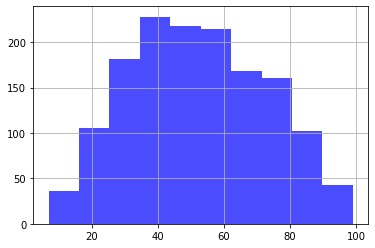

In [45]:
data.hour_bef_humidity.hist(color = 'b', alpha = .7)
plt.show()

In [49]:
data['hour'].max()

23

In [48]:
m, std

(52.23129718599863, 20.370386500678695)

In [50]:
m = data.hour_bef_humidity.mean() # 평균 

In [51]:
std = data.hour_bef_humidity.std() # 표준편차

In [52]:
data['standardized_value'] = (data.hour_bef_humidity - m) / std

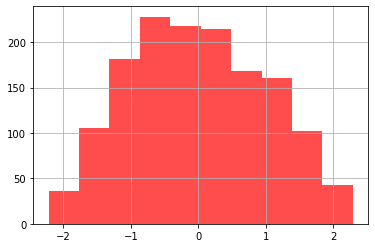

In [53]:
data['standardized_value'].hist(color = 'r', alpha = .7)
plt.show()

신뢰수준 95%, 99% z값이 +1.96, -1.96, +2.58, -2.58

#### sklaern의 StandardScaler사용!
- 작업형 1의 경우는 전체 데이터에 대해 fit_transform 가능
- 작업형 2의 경우(모델링) 학습 데이터에 대해서만 fit_transform 가능 / 예측 데이터에 대해서는 transform만 가능

In [56]:
from sklearn.preprocessing import StandardScaler # 표준화 스케일링

In [55]:
scaler = StandardScaler()

In [59]:
data[['hour_bef_humidity']]

,hour_bef_humidity
0,89.0
1,48.0
2,79.0
3,54.0
4,7.0
...,...
1454,53.0
1455,45.0
1456,54.0
1457,37.0


In [60]:
data['scaler_value'] = scaler.fit_transform(data[['hour_bef_humidity']])

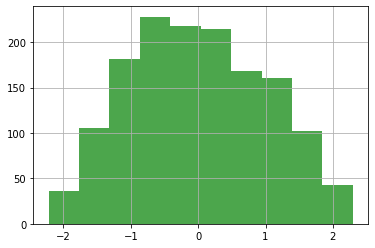

In [61]:
data['scaler_value'].hist(color = 'g', alpha = .7)
plt.show()

In [140]:
data.iloc[:, -2:].head()

,standardized_value,scaler_value
0,1.805008,1.805627
1,-0.207718,-0.207789
2,1.314099,1.314550
3,0.086827,0.086857
4,-2.220444,-2.221206


***
#### 2-2. 정규화

- 목적 : 데이터의 상대적 크기에 대한 영향을 줄이기 위해 데이터 범위를 0~1로 변환한다.

$X_{new}$ = $X - min(X)\over max(X) - min(X)$
    
- (개별 값 - 최소값) / (최대값 - 최소값)

- 최대값 - 최소값은 "범위"

In [62]:
MAX = data['hour_bef_humidity'].max()
MIN = data['hour_bef_humidity'].min()

In [63]:
data['minmax_value'] = (data['hour_bef_humidity'] - MIN) / (MAX - MIN)

<AxesSubplot:>

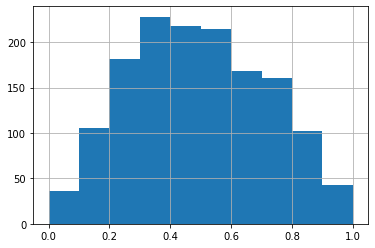

In [64]:
data['minmax_value'].hist()

표준화와 동일하게 sklearn에 정규화를 할 수 있는 MinMaxSclaer가 존재한다.

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()

In [67]:
data['sklearn_minmax'] = scaler.fit_transform(data[['hour_bef_humidity']])

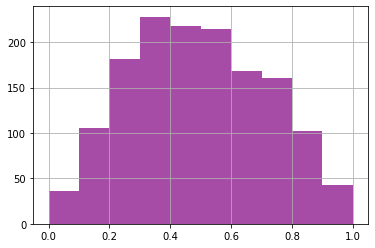

In [68]:
data['sklearn_minmax'].hist(color = 'purple', alpha = .7)
plt.show()

In [70]:
data.iloc[:, -2:].head()

,minmax_value,sklearn_minmax
0,0.891304,0.891304
1,0.445652,0.445652
2,0.782609,0.782609
3,0.510870,0.510870
4,0.000000,0.000000


<font color = 'red'>Quiz> hour_bef_pm10컬럼에 대해 표준화, 정규화를 실시하시오. 이후 각각에 대해 3분위수(75%)를 출력하시오.

In [92]:
data2 = data.fillna(0)

In [94]:
s_scaler = StandardScaler()
m_scaler = MinMaxScaler()

In [95]:
standard = s_scaler.fit_transform(data2[['hour_bef_pm10']])
minmax = m_scaler.fit_transform(data2[['hour_bef_pm10']])

In [ ]:
[[0.005],
[0.12312],
[0.123123]]

In [96]:
s = [x[0] for x in standard]

In [97]:
m = [x[0] for x in minmax]

In [99]:
s_q3 = np.percentile(s, 75)
m_q3 = np.percentile(m, 75)

In [100]:
s_q3, m_q3

(0.42606183802410313, 0.2527881040892193)

***
#### 2-3. 로그 변환

- 데이터가 일방적으로 한쪽으로 값이 치우쳐져 있을 경우 사용한다.
- Machine Learning은 정규 분포 형태를 가정하기 때문에 정규 분표 형태를 띄도록 하는 것이 가장 중요하다.

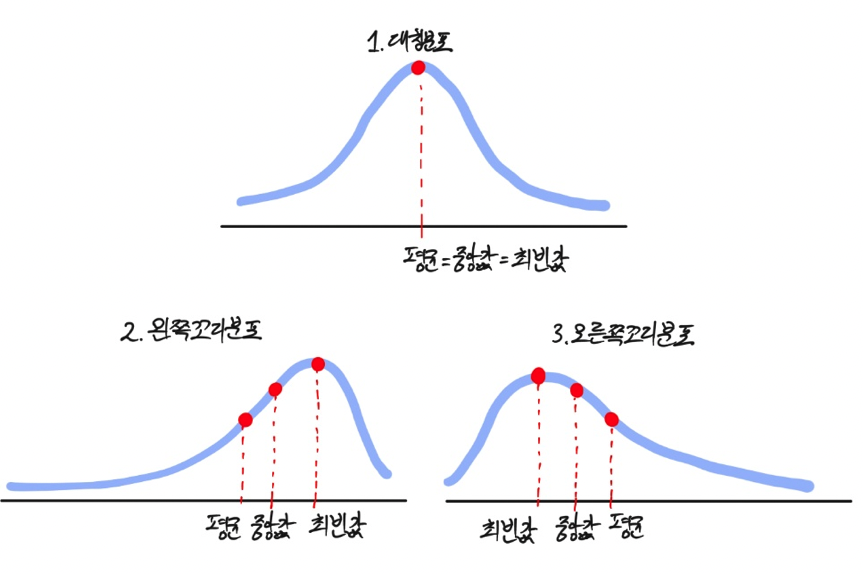

In [155]:
Image('왜도.png')

출처 : https://gooopy.tistory.com/120

왜도(Skewness)가 0에 가까울수록 데이터가 정규 분포 형태를 띈다고 할 수 있다.
- 정규분포 : 왜도 = 0
- 왼쪽 꼬리 분포 : 왜도 < 0
- 오른쪽 꼬리 분포 : 왜도 > 0

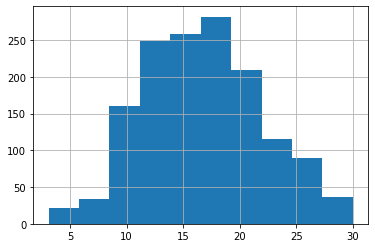

In [101]:
data['hour_bef_temperature'].hist()
plt.show()

In [102]:
print(f'hour_bef_temperature의 왜도는 {data.hour_bef_temperature.skew()}')

hour_bef_temperature의 왜도는 0.17522408110232682


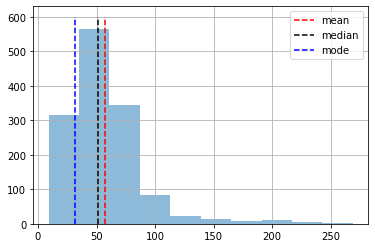

In [103]:
data['hour_bef_pm10'].hist(alpha = 0.5)
plt.vlines(data['hour_bef_pm10'].mean(), 0, 600, color = 'r', linestyles = '--', label = 'mean')
plt.vlines(data['hour_bef_pm10'].median(), 0, 600, color = 'black', linestyles = '--', label = 'median')
plt.vlines(data['hour_bef_pm10'].mode(), 0, 600, color = 'b', linestyles = '--', label = 'mode')
plt.legend()
plt.show()

In [104]:
print(f'hour_bef_pm10의 왜도는 {data["hour_bef_pm10"].skew()}')

hour_bef_pm10의 왜도는 2.3854639567027447


np.log, np.log10.....

- np.log1p -> 0과 같은 데이터 값에 1을 더해서 로그값을 취해준다.

In [106]:
np.log(0 + 1)

0.0

In [107]:
data['log_pm10'] = np.log1p(data['hour_bef_pm10'])

In [108]:
print(f'로그 변환 후 hour_bef_pm10의 왜도는 {data["log_pm10"].skew()}')

로그 변환 후 hour_bef_pm10의 왜도는 0.24862811625108097


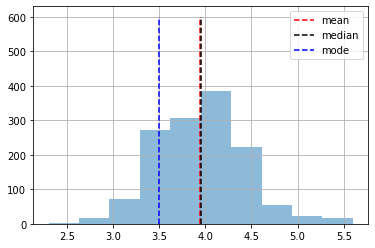

In [192]:
data['log_pm10'].hist(alpha = 0.5)
plt.vlines(data['log_pm10'].mean(), 0, 600, color = 'r', linestyles = '--', label = 'mean')
plt.vlines(data['log_pm10'].median(), 0, 600, color = 'black', linestyles = '--', label = 'median')
plt.vlines(data['log_pm10'].mode(), 0, 600, color = 'b', linestyles = '--', label = 'mode')
plt.legend()
plt.show()